# customer segmentation using k-means clustering 

# step1 import library

In [1]:
#importing libarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# step2 importing data

In [2]:
#import dataset
df=pd.read_csv('DATA/Mall_customers.csv',index_col=0,header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# step3 EDA

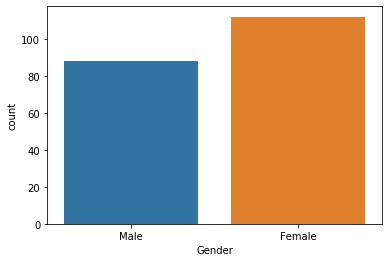

In [3]:
#count plot on single categorical variable
sns.countplot( x= 'Gender', data= df)
plt.show()

female comes more for shopping then male in the mall 


In [4]:
df['Gender'].value_counts() #use to count categorical variable 

Female    112
Male       88
Name: Gender, dtype: int64

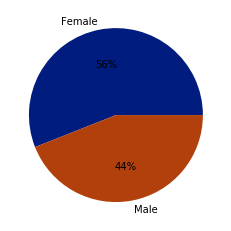

In [5]:
#declaring data
Data=[112,88]
keys=['Female','Male']
palette_color=sns.color_palette('dark')
plt.pie(Data,labels=keys, colors=palette_color,autopct='%.0f%%')
plt.show()

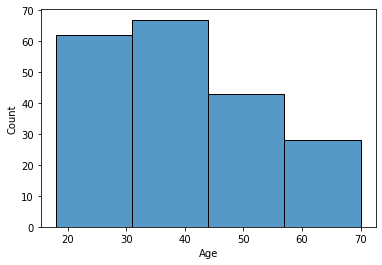

In [6]:
#plot histogram 
sns.histplot( data= df, x="Age",bins=4,kde=False)
plt.show()

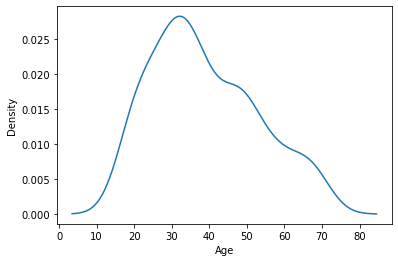

In [7]:
# Generate a histogram-like plot using kdeplot
sns.kdeplot(data=df["Age"])

# Set the x-axis label
plt.xlabel("Age")

# Display the plot
plt.show()

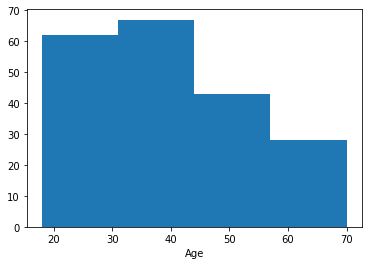

In [8]:
plt.hist(data=df,x="Age", bins=4,)
plt.xlabel("Age")
plt.show()

people mostly come to mall from age group of 20 to 45 

In [9]:
sns.__version__

'0.11.2'

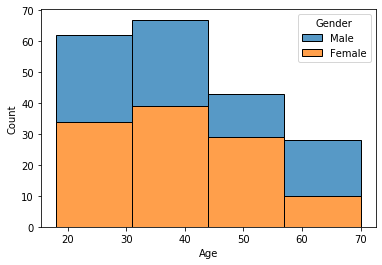

In [10]:
sns.histplot(data=df,x="Age",bins= 4 , hue="Gender",multiple="stack",kde=False)
plt.show()

female's from age group 20 to 55 come more to mall for shopping than boys

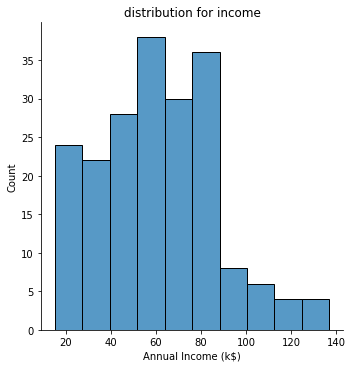

In [11]:
sns.displot(df,x="Annual Income (k$)")
plt.title("distribution for income")
plt.show()


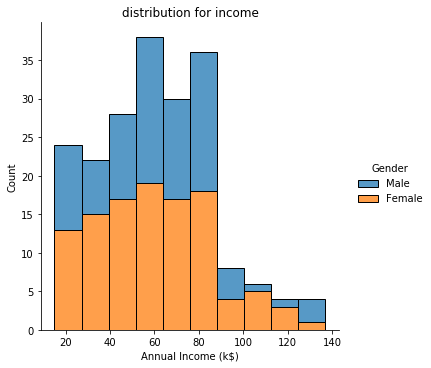

In [12]:
sns.displot(df,x="Annual Income (k$)", hue="Gender",multiple="stack")
plt.title("distribution for income")
plt.show()


women spend more than men according to the annual income  of the people

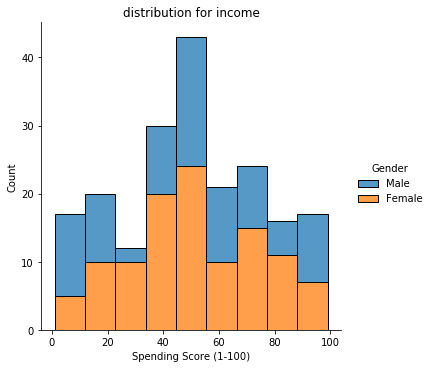

In [13]:
sns.displot(df,x="Spending Score (1-100)", hue="Gender",multiple="stack")
plt.title("distribution for income")
plt.show()


women having age from 35 to 75 have more spending score than compared to male

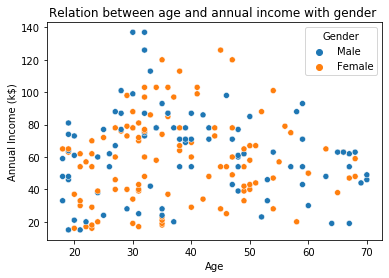

In [14]:
sns.scatterplot(data=df,x="Age",y="Annual Income (k$)", hue="Gender")
plt.title("Relation between age and annual income with gender ")
plt.show()



there is no relation between age and annual income variable with respect to male and female 

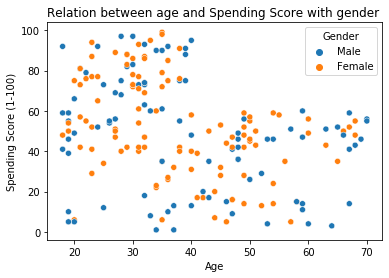

In [15]:
sns.scatterplot(data=df,x="Age",y="Spending Score (1-100)", hue="Gender")
plt.title("Relation between age and Spending Score with gender ")
plt.show()



there is no relation between age and spending variable  variable with respect to male and female 

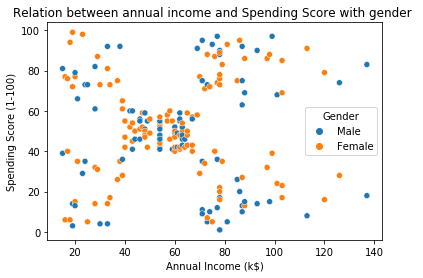

In [16]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)", hue="Gender")
plt.title("Relation between annual income and Spending Score with gender ")
plt.show()



there is relation which is visible when we compare annual income and spending score 
we can see clusters created and that's the reason behind performing clustering on the given Data set

# Step4 Data preprocessing

In [17]:
print(df.info())
print(df.shape)
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.8+ KB
None
(200, 4)
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [18]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [19]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

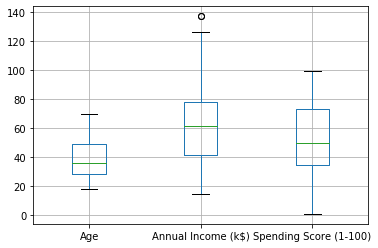

In [20]:
df.boxplot()
plt.show()

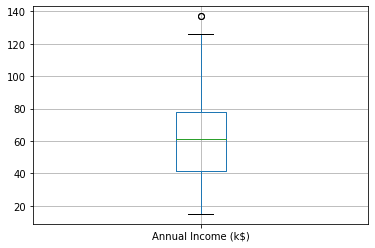

In [21]:
df.boxplot("Annual Income (k$)")
plt.show()

In [22]:
X=df.iloc[:,2:4] # [start row:end row,start col:end col]

In [23]:
print(X)

            Annual Income (k$)  Spending Score (1-100)
CustomerID                                            
1                           15                      39
2                           15                      81
3                           16                       6
4                           16                      77
5                           17                      40
...                        ...                     ...
196                        120                      79
197                        126                      28
198                        126                      74
199                        137                      18
200                        137                      83

[200 rows x 2 columns]


In [24]:
%%time
#using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm
K_MAX=15
wsse=[]
#progress bar
with tqdm(total=K_MAX -1) as pbar:
    for i in range(1,K_MAX):
        
        kmeans=KMeans(n_clusters = i, random_state=10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)


Wall time: 9.5 s


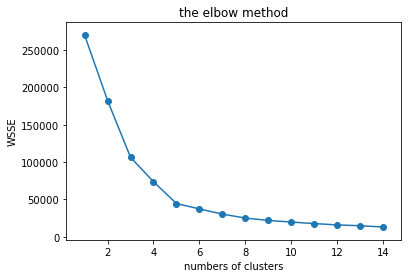

In [25]:
plt.plot(range(1,K_MAX),wsse)
plt.scatter(range(1,K_MAX),wsse)
plt.title('the elbow method')
plt.xlabel('numbers of clusters')
plt.ylabel('WSSE')
plt.show()

In [26]:
print(wsse[4])


44448.45544793371


In [27]:
#fitting K_Means to the dataset
kmeans= KMeans(n_clusters=5, random_state=10)
Y_pred=kmeans.fit_predict(X)


In [28]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [29]:
kmeans.n_iter_

3

In [30]:
df["clusters"]=Y_pred

In [31]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


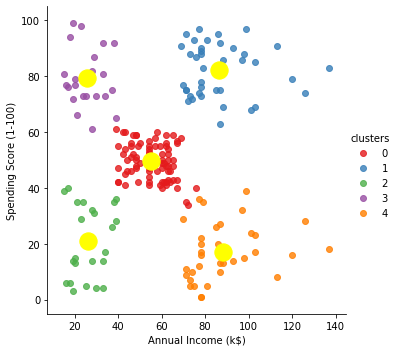

In [32]:
sns.lmplot(data=df,
           x="Annual Income (k$)",
           y="Spending Score (1-100)",fit_reg=False,
          hue="clusters",
          palette="Set1")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=300,c="yellow")
plt.show()

In [33]:
print(kmeans.cluster_centers_[:,0])
print(kmeans.cluster_centers_[:,1])


[55.2962963  86.53846154 26.30434783 25.72727273 88.2       ]
[49.51851852 82.12820513 20.91304348 79.36363636 17.11428571]


In [34]:
df["Clusters"]=df.clusters.map({0:"Standard",1:"target",2:"Sensibe",3:"Careless",4:"carefull"})

In [35]:
df.head(10)


,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,Clusters
CustomerID,,,,,,
1,Male,19,15,39,2,Sensibe
2,Male,21,15,81,3,Careless
3,Female,20,16,6,2,Sensibe
4,Female,23,16,77,3,Careless
5,Female,31,17,40,2,Sensibe
6,Female,22,17,76,3,Careless
7,Female,35,18,6,2,Sensibe
8,Female,23,18,94,3,Careless
9,Male,64,19,3,2,Sensibe


In [36]:
new_df=df[df["Clusters"]=="target"]

In [37]:
new_df.shape

(39, 6)

In [38]:
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters,Clusters
CustomerID,,,,,,
124,Male,39,69,91,1,target
126,Female,31,70,77,1,target
128,Male,40,71,95,1,target
130,Male,38,71,75,1,target
132,Male,39,71,75,1,target


In [39]:
new_df.to_csv(r"TargetCustomers.csv",index=True)